In [1]:
import os
import json
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# Define folder paths
first_folder = '../devoir/DVI1'  # Folder with 16 images
second_folder = '../devoir/DVI2'  # Folder with 4 images

# Define function to calculate histograms
def calculate_color_histogram(image_path):
    img = cv2.imread(image_path)
    chans = cv2.split(img)
    colors = ("b", "g", "r")
    histograms = {}

    for chan, color in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        histograms[color] = hist.tolist()
    return histograms

# Define function to calculate dominant colors
def find_dominant_colors(image_path, k=20, threshold=0.05):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k, random_state=0).fit(img)
    counts = Counter(kmeans.labels_)
    total_pixels = sum(counts.values())

    dominant_colors = [kmeans.cluster_centers_[idx].tolist()
                    for idx, count in counts.items() if count / total_pixels > threshold]
    return dominant_colors

# Initialize dictionaries to hold data
histogram_data = {}
dominant_color_data = {}

# Calculate and store characteristics for images in the first folder
for filename in os.listdir(first_folder):
    if filename.endswith(('.jpg', '.png')):
        img_path = os.path.join(first_folder, filename)

        # Calculate and store histogram
        histogram_data[filename] = calculate_color_histogram(img_path)
        
        # Calculate and store dominant colors
        dominant_color_data[filename] = find_dominant_colors(img_path)

# Save data to JSON files
with open("histograms.json", "w") as hist_file:
    json.dump(histogram_data, hist_file)

with open("dominant_colors.json", "w") as color_file:
    json.dump(dominant_color_data, color_file)


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to plot similar images
def plot_similar_images(metric_distances, title):
    plt.figure(figsize=(15, 8))
    plt.suptitle(title, fontsize=20)

    # Display chosen image
    chosen_img = Image.open(os.path.join(second_folder, filename))
    plt.subplot(2, 4, 1)
    plt.imshow(chosen_img)
    plt.axis('off')
    plt.title("Chosen Image")
    
    # Display similar images
    for i, (image_name, dist) in enumerate(metric_distances, start=2):
        similar_img = Image.open(os.path.join(first_folder, image_name))
        plt.subplot(2, 4, i)
        plt.imshow(similar_img)
        plt.axis('off')
        plt.title(f"{image_name}\nDist: {dist:.4f}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


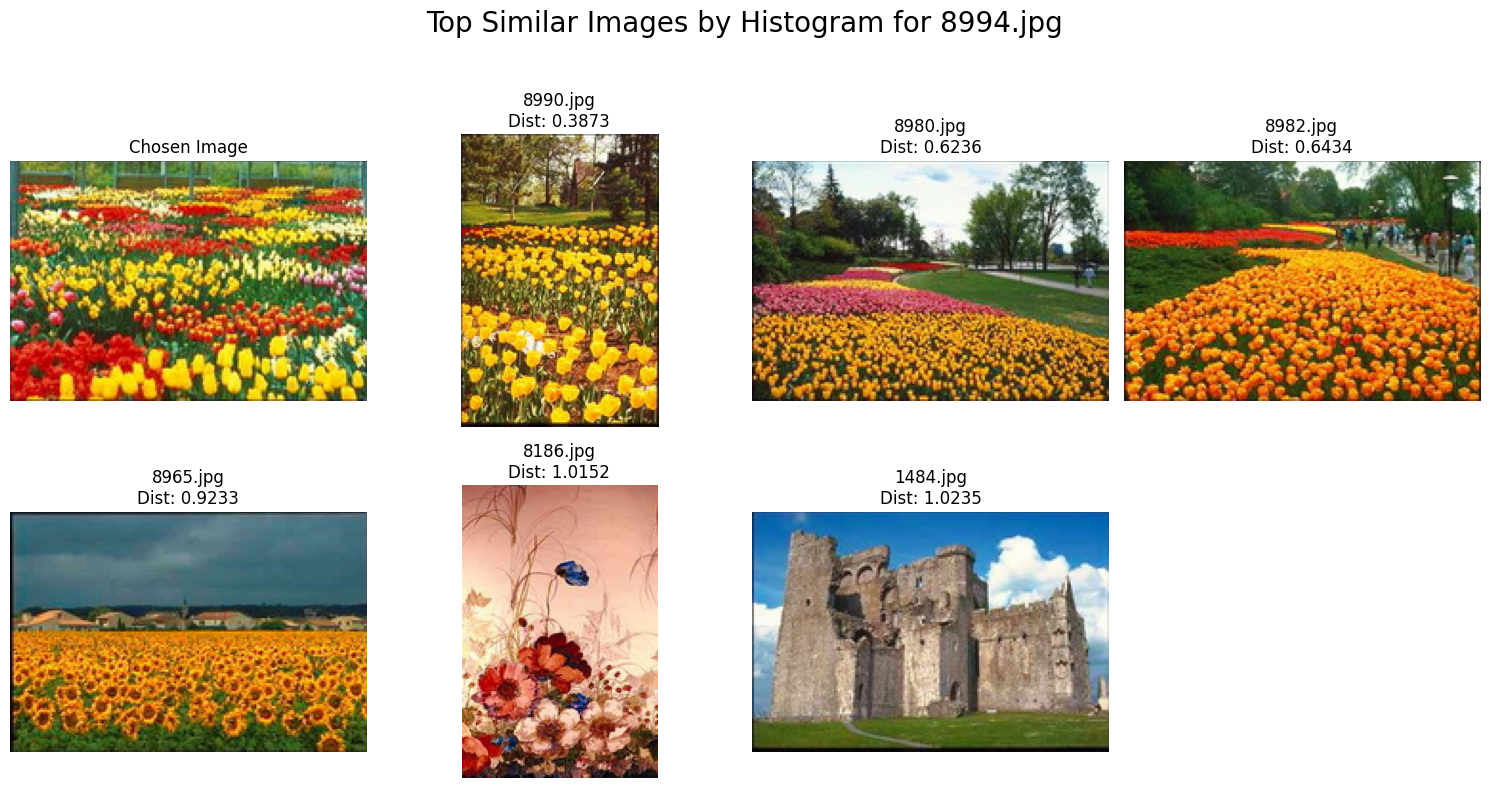

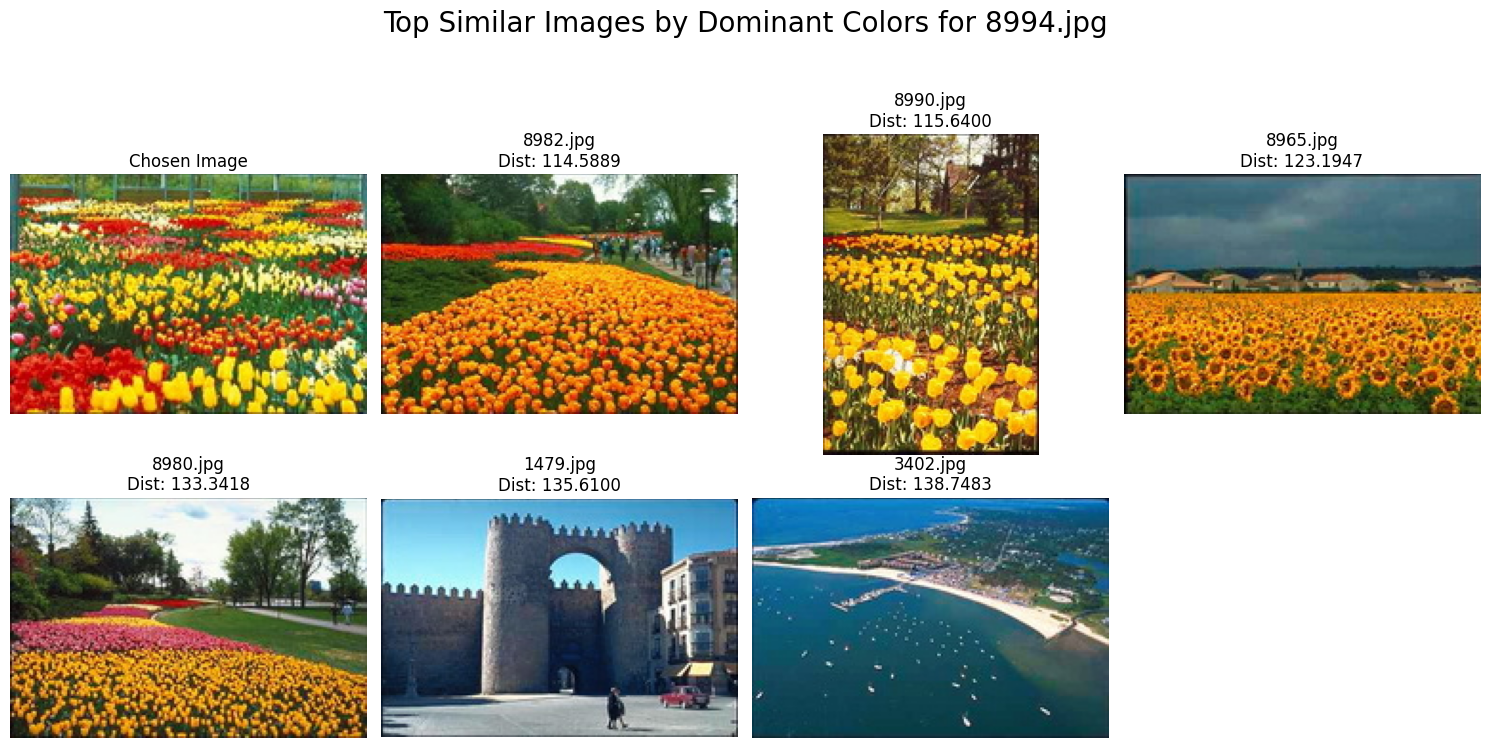

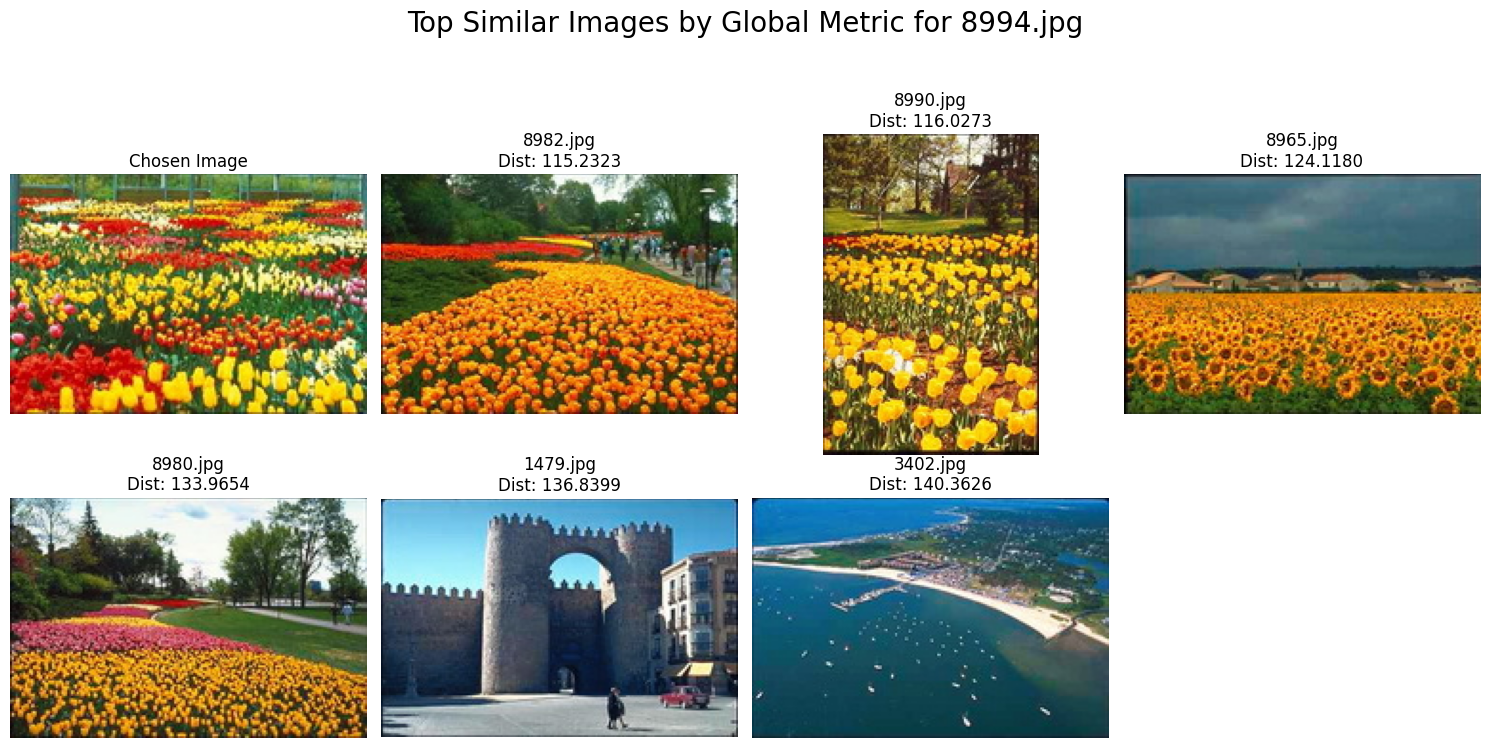

In [7]:
import json
import random
import cv2
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import KMeans
from collections import Counter

# Load the precomputed characteristics
with open("histograms.json", "r") as hist_file:
    histogram_data = json.load(hist_file)

with open("dominant_colors.json", "r") as color_file:
    dominant_color_data = json.load(color_file)

# Define functions for similarity calculations
def bhattacharyya_distance(hist1, hist2):
    return sum(cv2.compareHist(np.array(hist1[color], dtype=np.float32), 
                               np.array(hist2[color], dtype=np.float32), 
                               cv2.HISTCMP_BHATTACHARYYA) for color in ("b", "g", "r"))

def dominant_color_distance(colors1, colors2):
    return distance.cdist(np.array(colors1), np.array(colors2), 'euclidean').mean()

# Function to calculate histograms and dominant colors for an image
def calculate_color_histogram(image_path):
    img = cv2.imread(image_path)
    chans = cv2.split(img)
    colors = ("b", "g", "r")
    histograms = {}
    for chan, color in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        histograms[color] = hist.tolist()
    return histograms

def find_dominant_colors(image_path, k=20, threshold=0.05):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img)
    counts = Counter(kmeans.labels_)
    total_pixels = sum(counts.values())
    return [kmeans.cluster_centers_[idx].tolist() for idx, count in counts.items() if count / total_pixels > threshold]

# Randomly select one image from the second folder
second_folder = '../devoir/DVI2'  # Folder with 4 images
selected_image = random.choice([f for f in os.listdir(second_folder) if f.endswith(('.jpg', '.png'))])
selected_image_path = os.path.join(second_folder, selected_image)

# Calculate characteristics of the selected image
chosen_histogram = calculate_color_histogram(selected_image_path)
chosen_dominant_colors = find_dominant_colors(selected_image_path)

# Calculate distances to each image in the first folder
histogram_distances = []
dominant_color_distances = []
global_distances = []

first_folder = '../devoir/DVI1'  # Folder with 16 images
for img_name in histogram_data.keys():
    # Histogram distance
    hist_dist = bhattacharyya_distance(chosen_histogram, histogram_data[img_name])
    histogram_distances.append((img_name, hist_dist))

    # Dominant color distance
    color_dist = dominant_color_distance(chosen_dominant_colors, dominant_color_data[img_name])
    dominant_color_distances.append((img_name, color_dist))

    # Global (combined) distance
    combined_distance = hist_dist + color_dist
    global_distances.append((img_name, combined_distance))

# Sort and select top 6 similar images
histogram_distances = sorted(histogram_distances, key=lambda x: x[1])[:6]
dominant_color_distances = sorted(dominant_color_distances, key=lambda x: x[1])[:6]
global_distances = sorted(global_distances, key=lambda x: x[1])[:6]

# Display similar images based on each metric
plot_similar_images(histogram_distances, f"Top Similar Images by Histogram for {selected_image}")
plot_similar_images(dominant_color_distances, f"Top Similar Images by Dominant Colors for {selected_image}")
plot_similar_images(global_distances, f"Top Similar Images by Global Metric for {selected_image}")
